<a href="https://colab.research.google.com/github/ykim879/whats.todays.trend/blob/master/revised_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import queue
import threading
def eachNewsHeadlines(ID, q):
	response = requests.get('https://newsapi.org/v2/top-headlines?sources=' + ID + '&apiKey=' + key)
	json = response.json()
	if json['status'] != 'ok':
		raise IOError('API key is probably overused :(')
	topNews = []
	topNews.append(ID)
	for elem in json['articles']:
		topNews.append(elem['title'])
	q.put(topNews)

In [6]:
import requests
import pandas as pd
key = '5e74c7cf9e344e3e8c04210f9b75125b'
response = requests.get('https://newsapi.org/v2/sources?'
			   'language=en&country=us&'
			   'apiKey=' + key)
sources = response.json()['sources']
df = pd.DataFrame();
pd.set_option('display.max_columns', 7)
for source in sources:
  row = pd.Series(source)
  df = df.append(row, ignore_index = True)
df.set_index("name", inplace = True)
#collects headline
threads = []
q = queue.Queue()
for id in df['id']:
  t = threading.Thread(target = eachNewsHeadlines, args = (id, q))
  threads.append(t)
  t.start()
for t in threads:
  t.join()
headlines = []
while not q.empty():
  headlines.extend(q.get())
print(headlines)

Exception in thread Thread-99:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-1-5c882d89a6eb>", line 7, in eachNewsHeadlines
    raise IOError('API key is probably overused :(')
OSError: API key is probably overused :(

Exception in thread Thread-90:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-1-5c882d89a6eb>", line 7, in eachNewsHeadlines
    raise IOError('API key is probably overused :(')
OSError: API key is probably overused :(

Exception in thread Thread-88:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
 

['al-jazeera-english', "COVID-19: US passes 'unfathomable' 200,000 death toll", "Iran says 'internal agents' may be responsible for Natanz blast", 'Palestine quits Arab League role in protest over Israel deals', 'mashable', "How to make iPhone's Screen Time actually helpful", 'AOC opens up about death threats after baseball team shows offensive video of her', 'Uber will now kick off riders with low ratings', 'Metal Mario makes his Hot Wheels debut this summer', 'Amazon challenges Google with smaller, cheaper Echo Show', 'DC’s ‘Doom Patrol’ is the rare superhero show that understands trauma', 'Trump and Biden court older women demographic with Facebook ads', 'fox-sports', '', 'WWE', '', 'MLB', 'Watch WWE Friday Night SmackDown from July 17th in 3 minutes | FRIDAY NIGHT SMACKDOWN (VIDEO)', "Which two members of the Madden 21 '99 Club' would you build around?", 'MVP, Cy Young, Rookie of the Year: Who are favorites to win MLB awards?', '', 'NFL News, Videos, Scores, Teams, Standings, Stats

   keywords  counts
0     trump      15
1   thehill      14
2      says      13
3      news      12
4       new      11
5   insider      10
6       ign       9
7    google       8
8  election       7
9     covid       6


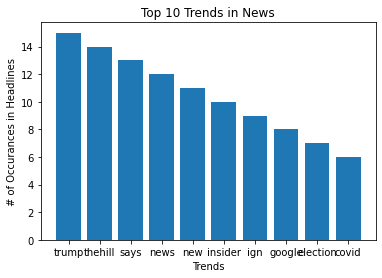

In [22]:
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = text.CountVectorizer(stop_words=stop_words, min_df=10)
X = vectorizer.fit_transform(headlines)
keywordDCT = sorted(vectorizer.vocabulary_.items(), key = lambda x:x[1], reverse = True)
keywordDF = pd.DataFrame(keywordDCT, columns = ['keywords', 'counts'])
print(keywordDF[:10])
plt.bar(keywordDF['keywords'][:10], keywordDF['counts'][:10])
plt.title('Top 10 Trends in News')
plt.ylabel('# of Occurances in Headlines')
plt.xlabel('Trends')
plt.show()